## Applying a genetic algorithm to train a bot to play the snake game

In [1]:
import numpy as np
import scipy
import random
from statistics import mean
import json

### Snake Game Logic

In [2]:
class snake_game:
    """ Representing the snake game
    """
    def __init__(self,x,y):
        """ initialize the board to an initial state, ideally atleast 10x10
        """
        self.x = x # the x-dimension for the game window
        self.y = y # the y-dimension for the game window
        self.board = np.zeros((x,y)) # zeros are area which contain nothing
        self.non_snake_positions = self.get_all_board_indices() # tuples of (x,y) pairs where the snake is not
        self.snake_positions = [] # tuples of (x,y) pairs where the snake is
        self.points = 0 # the player points (fitness)
        self.reward_position = None # (x,y) position on the board will always be the reward
        self.game_over = False # specifies when the game is complete
        self.head_position = None # (x,y) position on the board for the head of snake
    
    def get_all_board_indices(self):
        """ Makes indices for all board positions
        """
        indices = []
        for i in range(self.x):
            for j in range(self.y):
                indices.append((i,j))
        return indices
    
    def start_game(self):
        """ Initializes the snake and the first reward
        """
        mid_point_x = self.x // 2
        mid_point_y = self.y // 2
        
        self.snake_positions.append((mid_point_x,mid_point_y)) # head
        self.snake_positions.append((mid_point_x,mid_point_y-1)) # body
        self.snake_positions.append((mid_point_x,mid_point_y-2)) # body
        self.head_position = (mid_point_x,mid_point_y)
        
        self.non_snake_positions.remove((mid_point_x,mid_point_y)) # remove snake-positions
        self.non_snake_positions.remove((mid_point_x,mid_point_y-1))
        self.non_snake_positions.remove((mid_point_x,mid_point_y-2))
        
        self.board[mid_point_x,mid_point_y] = 3 # head
        self.board[mid_point_x,mid_point_y-1] = 2 # body
        self.board[mid_point_x,mid_point_y-2] = 2 # body
        
        reward_spot = self.place_reward()
        self.board[reward_spot[0],reward_spot[1]] = 1 # reward
    
    def make_a_move(self, move):
        """ move = "left","right","up","down" (absolute positioning)
        """
        old_head = self.snake_positions[0]
        old_tail = self.snake_positions[-1]
        new_head = old_head
        
        if move == "up":
            new_head = (new_head[0]-1,new_head[1]) # updating x position
        elif move == "down":
            new_head = (new_head[0]+1,new_head[1]) # updating x position
        elif move == "left":
            new_head = (new_head[0],new_head[1]-1) # updating y position
        else: # right
            new_head = (new_head[0],new_head[1]+1) # updating y position
        
        game_over = self.check_if_game_over(new_head)
        self.game_over = game_over
        
        if not game_over:
            new_reward = self.check_if_reward_found(new_head)
            self.head_position = new_head
            self.snake_positions.insert(0,new_head) # add the new head
            self.non_snake_positions.remove(new_head) # update the non-snake positions
            self.board[old_head[0],old_head[1]] = 2 # updating old head to be body
            self.board[new_head[0],new_head[1]] = 3 # appending the the head
            
            if new_reward == None: # did not reach the reward
                del self.snake_positions[-1] # remove the old tail
                self.non_snake_positions.append(old_tail)
                self.board[old_tail[0],old_tail[1]] = 0 # removing old tail from board
            
            else: # the reward was reached, keep the old tail
                self.board[new_reward[0],new_reward[1]] = 1
                
        return self.board,self.points,self.game_over
        
    def check_if_reward_found(self,new_head):
        """ If reached a reward, updates position of new reward and gets position of new tail
        """
        if new_head == self.reward_position:
            self.points += 1
            new_reward = self.place_reward()
            return new_reward
        return None
    
    def check_if_game_over(self,new_head):
        """ Returns True if the game is over
        """
        if new_head in self.snake_positions[1:]: # hit own body
            return True
        elif new_head[0] < 0 or new_head[0] >= self.x: # x-coordinate out of bounds
            return True
        elif new_head[1] < 0 or new_head[1] >= self.y: # y-coordinate out of bounds
            return True
        elif len(self.snake_positions) == self.x*self.y-1: # won the game
            return True
        else:
            return False
    
    def place_reward(self):
        """ Randomly places the reward 
        """
        spot = random.choice(self.non_snake_positions)
        self.reward_position = spot
        return spot


In [3]:
game = snake_game(10,10)

In [4]:
game.start_game()

In [5]:
game.board

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
board,points,game_over = game.make_a_move("up")
print(points,game_over)
board

0 False


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Genetic Algorithm

In [7]:
num_parents = 10
num_offspring = int(num_parents / 2)
parent_combos = [] # list of tuples of all possible parent combinations, for crossover
for i in range(num_offspring):
    for j in range(num_offspring):
        if i != j and (j,i) not in parent_combos:
            parent_combos.append((i,j))
            
print(parent_combos)
print(random.sample(parent_combos,int(len(parent_combos)/2)))

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[(2, 3), (2, 4), (3, 4), (1, 2), (1, 4)]


In [8]:
def initialize_parameters(h_size,board_width,num_parents):
    """ Initialized dictionaries with parameters w1,b1,w2,b2
    args:
        board_width: length of a side of the board (assuming square)
        h_size: the number of nodes in hidden layer
        num_parents: number of parents to initialize
    """
    parameter_list = [] # list of dicts which each hold random initializations for all the parameters
    for _ in range(num_parents):
        parent_dict = {}
        parent_dict["w1"] = np.random.rand(5,h_size) # board_width**2 @@@@
        parent_dict["b1"] = np.random.rand(h_size)
        parent_dict["w2"] = np.random.rand(h_size,4)
        parent_dict["b2"] = np.random.rand(4)
        parameter_list.append(parent_dict)
    return parameter_list

In [9]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))

In [10]:
def forward_prop(board_flat,parameters):
    """ forward propagation to get the prediction, tanh activation and softmax -> hardmax output, prediction for direction to move
        Used to make a single move in a game.
    args:
        board_flat: the flattened board, as input
        parameters: the weight and bias parameters in dict (for a single parent)
    """
    z1 = board_flat.dot(parameters["w1"]) + parameters["b1"]
    a1 = np.tanh(z1)
    z2 = a1.dot(parameters["w2"]) + parameters["b2"]
    pred = np.argmax(softmax(z2))
    return pred

In [21]:
def evaluate_fitness(parameters,show_moves=False): 
    """ Play the game with the parent to determine fitness (score from game)
    """
    game = snake_game(10,10)
    game.start_game()
    board = game.board
    game_over = False
    i = 0
    while not game_over: # while the bot has not lost yet
        i += 1
        if show_moves == True:
            print(board)
            print("-----------------------------------------")
        
        current_head = game.head_position # position where the bot is
        reward_position = game.reward_position
        features = np.zeros(5)
        if current_head[1]+1 <= 9:
            features[0] += board[current_head[0],current_head[1]+1] / max(board[current_head[0],current_head[1]+1],1)
        if current_head[1]-1 >= 0:
            features[1] += board[current_head[0],current_head[1]-1] / max(board[current_head[0],current_head[1]-1],1)
        if current_head[0]+1 <= 9:
            features[2] += board[current_head[0]+1,current_head[1]] / max(board[current_head[0]+1,current_head[1]],1)
        if current_head[0]-1 >= 0:
            features[3] += board[current_head[0]-1,current_head[1]] / max(board[current_head[0]-1,current_head[1]],1)
        if current_head[0]-reward_position[0] != 0:
            features[4] = (current_head[1]-reward_position[1]) / (current_head[0]-reward_position[0]) # angle to reward
        
        # features = board.flatten()
        pred = forward_prop(features,parameters)
        if pred == 0:
            move = "up"
        elif pred == 1:
            move = "down"
        elif pred == 2:
            move = "left"
        else:
            move = "right"
            
        board,points,game_over = game.make_a_move(move)
        if i == 1500:
            break
        
    return points # returns the points at the end of the game

In [12]:
h_size = 500
board_width = 10
num_parents = 10
parameters_list = initialize_parameters(h_size,board_width,num_parents)
parameters = parameters_list[0]
score = evaluate_fitness(parameters)
print(score)

0


In [13]:
def select_stongest_parents(parents):
    """ Returns 50% of the parents with the highest fitness
    """
    len_parents = len(parents)
    scores = [(parameters,evaluate_fitness(parameters)) for parameters in parents] # [(parameters,score),...]
    scores.sort(key=lambda tup:tup[1], reverse=True)
    best_parents = [tup[0] for tup in scores[0:int(len_parents/2)]]
    best_fitness_values = [tup[1] for tup in scores[0:int(len_parents/2)]]
    return best_parents,best_fitness_values

In [14]:
def get_parent_combos(num_parents):
    """ Returns list of tuples of all possible parent combinations, for crossover
    """
    num_offspring = int(num_parents / 2)
    parent_combos = []
    for i in range(num_offspring):
        for j in range(num_offspring):
            if i != j and (j,i) not in parent_combos:
                parent_combos.append((i,j))
    return parent_combos

In [40]:
def create_offspring(parents,parent_combos):
    """ Creates len_parents/2 children crossover combinations. Includes crossover and mutation.
    """
    parent_combos = random.sample(parent_combos,int(len(parent_combos)/2))
    children = [] # all created children
    for combo in parent_combos:
        parent_1 = parents[combo[0]]
        parent_2 = parents[combo[1]]
        
        w1_shape = parent_1["w1"].shape
        w1_mask = np.random.choice([1,0],w1_shape[0]*w1_shape[1])
        b1_shape = parent_1["b1"].shape
        b1_mask = np.random.choice([1,0],len(b1_shape))
        w2_shape = parent_1["w2"].shape
        w2_mask = np.random.choice([1,0],w2_shape[0]*w2_shape[1])
        b2_shape = parent_1["b2"].shape
        b2_mask = np.random.choice([1,0],len(b2_shape))
        
        # crossover:
        child_w1 = (parent_1["w1"].flatten() * w1_mask) + (parent_2["w1"].flatten() * (w1_mask ^ 1))
        child_b1 = (parent_1["b1"] * b1_mask) + (parent_2["b1"] * (b1_mask ^ 1)) # no need to flatten
        child_w2 = (parent_1["w2"].flatten() * w2_mask) + (parent_2["w2"].flatten() * (w2_mask ^ 1))
        child_b2 = (parent_1["b2"] * b2_mask) + (parent_2["b2"] * (b2_mask ^ 1))
        
        #mutation (50% of chromosomes mutated):
        child_w1 = child_w1 + (np.random.rand(len(child_w1))*1*np.random.choice([0,1],len(child_w1)))
        child_w1.shape = w1_shape
        child_b1 = child_b1 + (np.random.rand(len(child_b1))*1*np.random.choice([0,1],len(child_b1)))
        child_w2 = child_w2 + (np.random.rand(len(child_w2))*1*np.random.choice([0,1],len(child_w2)))
        child_w2.shape = w2_shape
        child_b2 = child_b2 + (np.random.rand(len(child_b2))*1*np.random.choice([0,1],len(child_b2)))
        
        new_child = {} # creating new child
        new_child["w1"] = child_w1
        new_child["b1"] = child_b1
        new_child["w2"] = child_w2
        new_child["b2"] = child_b2
        children.append(new_child)
            
    return children

In [16]:
## testing intermediate steps
h_size = 200
board_width = 10
num_parents = 10
parameters_list = initialize_parameters(h_size,board_width,num_parents)
parameters = parameters_list[0]
score = evaluate_fitness(parameters)
print(score)

best_parents,best_fitness_values = select_stongest_parents(parameters_list)
print(len(best_parents),best_fitness_values)

new_children = create_offspring(best_parents,parent_combos)
print(len(new_children),new_children[0].keys())

0
5 [0, 0, 0, 0, 0]
5 dict_keys(['w1', 'b1', 'w2', 'b2'])


In [38]:
def genetric_algorithm(generations=5,h_size=200,board_width=10,num_parents=80):
    """ Runs "natural selection" process for a set number of generations
    """
    parent_combos = get_parent_combos(num_parents)
    parents = initialize_parameters(h_size,board_width,num_parents) # initialize population
    fitness_values = []
    for i in range(generations):
        strongest_parents,best_fitness_values = select_stongest_parents(parents)
        fitness_values.append(mean(best_fitness_values))
        children = create_offspring(strongest_parents,parent_combos)
        parents = strongest_parents + children
    return fitness_values,parents

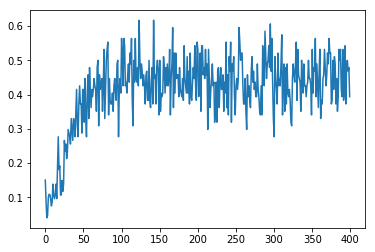

In [29]:
# fitness values over generations
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(fitness_values))],fitness_values)
plt.show()

In [163]:
"""w1 = best_parent["w1"]
np.save("./w1.npy",w1)
b1 = best_parent["b1"]
np.save("./b1.npy",b1)
w2 = best_parent["w2"]
np.save("./w2.npy",w2)
b2 = best_parent["b2"]
np.save("./b2.npy",b2)"""

In [158]:
### demo
evaluate_fitness(parents[0],True)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-----------------------------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
-----------------------------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 

1